In [1]:
import os

# Define the path to the unzipped folder
unzip_dir = r"D:\main project"  # Adjust the path accordingly


In [3]:
import glob
from pathlib import Path

train_path = r'D:\main project\train_images'
test_path  = r'D:\main project\test_images'

print('training set')
for filepath in glob.glob(train_path + '/*/'):
    files = glob.glob(filepath + '*')
    print(f"{len(files)} \t {Path(filepath).name}")

print('testing set')
for filepath in glob.glob(test_path + '/*/'):
    files = glob.glob(filepath + '*')
    print(f"{len(files)} \t {Path(filepath).name}")

training set
479 	 bacterial_leaf_blight
380 	 bacterial_leaf_streak
337 	 bacterial_panicle_blight
1738 	 blast
965 	 brown_spot
1442 	 dead_heart
620 	 downy_mildew
1594 	 hispa
1764 	 normal
1088 	 tungro
testing set


In [5]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#PreTrained Model
from tensorflow.keras.applications import *
#Image Generator DataAugmentation
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Splitting Data
# import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

In [9]:
directory = r"D:\main project\train_images"

# Initialize lists for file paths and labels
filepath = []
label = []

# Loop through the subdirectories in train_images
folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory, fold)

    # Ensure it is a directory (ignores other files, if any)
    if os.path.isdir(f_path):
        imgs = os.listdir(f_path)
        for img in imgs:
            img_path = os.path.join(f_path, img)
            filepath.append(img_path)
            label.append(fold)

# Create a DataFrame
file_path_series = pd.Series(filepath, name='filepath')
label_path_series = pd.Series(label, name='label')
df_train = pd.concat([file_path_series, label_path_series], axis=1)

# Display the first few rows of the DataFrame
print(df_train.head())

                                            filepath                  label
0  D:\main project\train_images\bacterial_leaf_bl...  bacterial_leaf_blight
1  D:\main project\train_images\bacterial_leaf_bl...  bacterial_leaf_blight
2  D:\main project\train_images\bacterial_leaf_bl...  bacterial_leaf_blight
3  D:\main project\train_images\bacterial_leaf_bl...  bacterial_leaf_blight
4  D:\main project\train_images\bacterial_leaf_bl...  bacterial_leaf_blight


In [13]:
from sklearn.model_selection import train_test_split
# Spliting in Train and Val
train_df , val_df = train_test_split(df_train ,train_size = 0.9 , shuffle = True ,random_state = 42 )

In [15]:
# Shape
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {val_df.shape}")

The shape of The Train data is: (9366, 2)
The shape of The Validation data is: (1041, 2)


In [17]:
#Data_Dir
data_dir = r'D:\main project\train_images'

print('Training Images:')
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

#Testing Augmented Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

Training Images:
Found 10407 files belonging to 10 classes.
Using 9367 files for training.
Validation Images:
Found 10407 files belonging to 10 classes.
Using 1040 files for validation.


In [21]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = r'D:\main project\test_images',
    batch_size = 32,
    image_size = (256, 256),
    label_mode = None,
    shuffle=False
)
test_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

Found 3469 files.


In [23]:
# Names of the classes
class_names = train_ds.class_names


# Print the class indices
print("Class indices for training generator:", class_names)

Class indices for training generator: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [25]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [27]:
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))


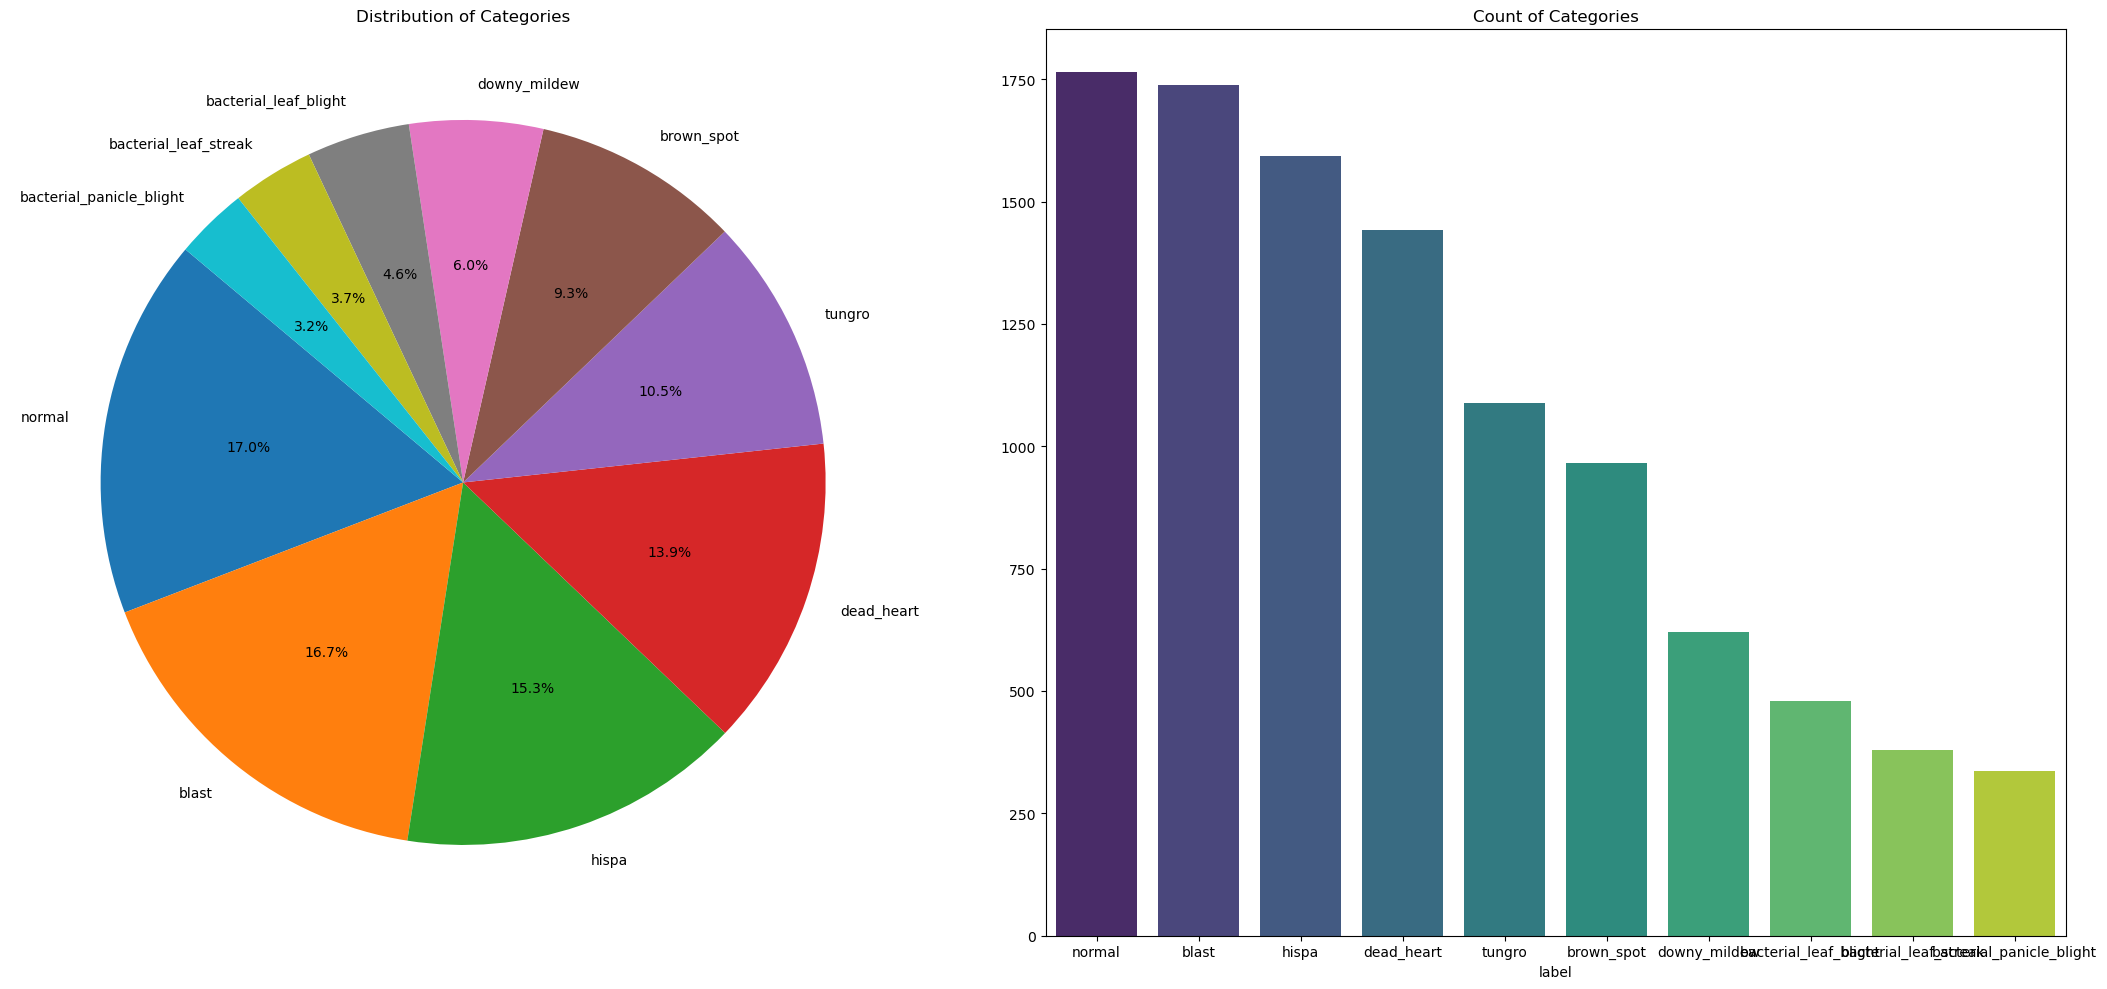

In [29]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(22, 10), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

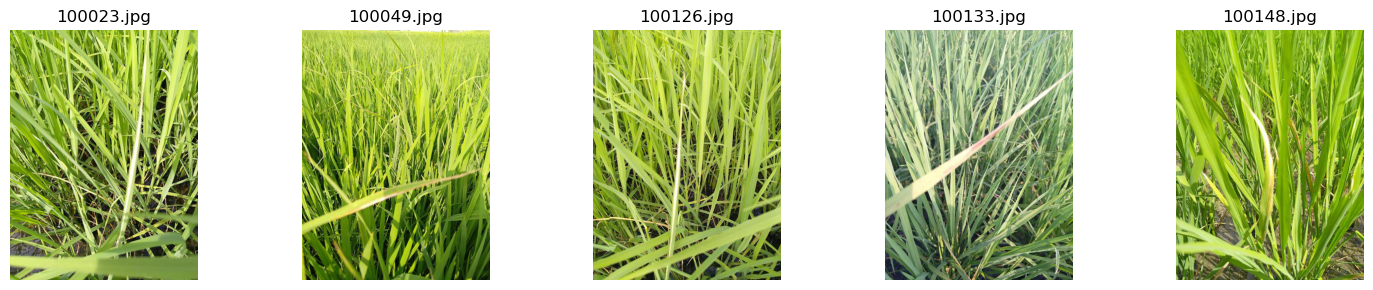

In [31]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = r"D:\main project\train_images\bacterial_leaf_blight"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

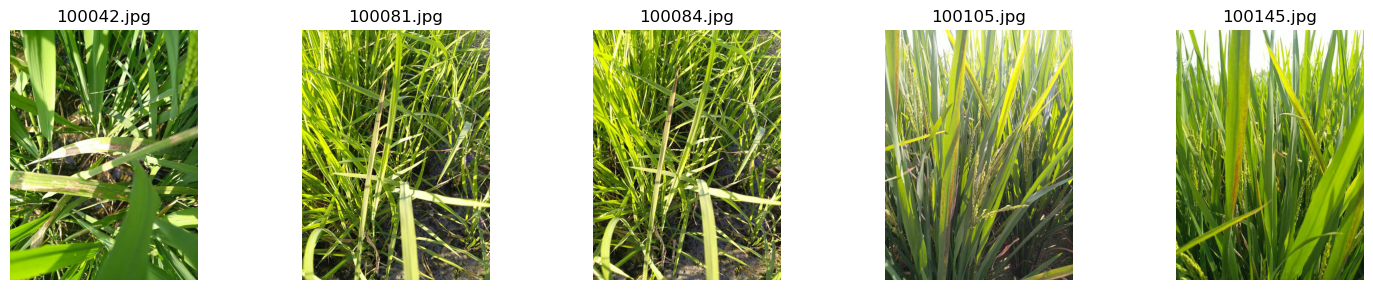

In [33]:
# Specify the path containing the images to visualize
path_to_visualize = r"D:\main project\train_images\bacterial_leaf_streak"
# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)


In [35]:
# Load the pre-trained DenseNet121 model without the top classification layer
DenseNet121_base = DenseNet121(weights='imagenet',
                                    include_top=False,
                                   input_shape=(256, 256, 3),
                                     pooling = 'avg'
                                   )

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [37]:
# Build the model
model = Sequential()

# Add the pre-trained DenseNet121_base
model.add(DenseNet121_base)

# Batch Normalization
model.add(BatchNormalization())

#Dropout
model.add(Dropout(0.35))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))


# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 220)            │       225,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,269,310 (27.73 MB)

 Trainable params: 229,758 (897.49 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [39]:
#Early_Stopping
early_stopping = EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

# Train the model
history = model.fit(train_ds,
                    epochs=100,
                    validation_data=validation_ds,
                    callbacks=early_stopping)

Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.5164 - loss: 1.4783 - val_accuracy: 0.7644 - val_loss: 0.7795
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.7614 - loss: 0.7196 - val_accuracy: 0.8337 - val_loss: 0.4988
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.8157 - loss: 0.5637 - val_accuracy: 0.8644 - val_loss: 0.3975
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.8436 - loss: 0.4638 - val_accuracy: 0.8731 - val_loss: 0.3583
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.8695 - loss: 0.3974 - val_accuracy: 0.8971 - val_loss: 0.3160
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.8819 - loss: 0.3481 - val_accuracy: 0.9048 - val_loss: 0.2741
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - accuracy: 0.9047 - loss: 0.2867 - val_accuracy: 0.9115 - val_loss: 0.2631
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.9137 - loss: 0.2545 - 

In [41]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


33/33 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9505 - loss: 0.1618
Validation Loss: 0.16815733909606934
Validation Accuracy: 0.9461538195610046


In [45]:
import matplotlib.pyplot as plt

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


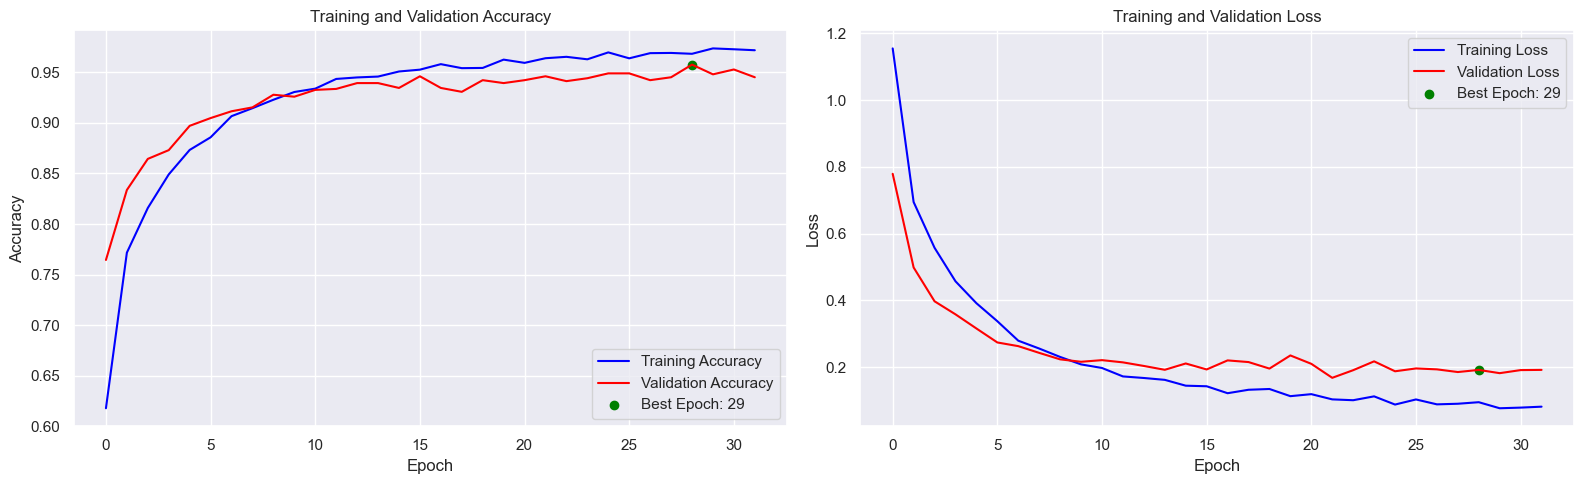

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the preferred option:
# plt.style.use('seaborn')  # Use a Matplotlib style
sns.set_theme(style="darkgrid")  # Use Seaborn theme if installed

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [57]:
img = image.load_img(img_path, target_size=(256, 256))  # Resize to (256, 256)


In [59]:
print(model.input_shape)


(None, 256, 256, 3)


In [65]:
from tensorflow.keras.applications import DenseNet121

model = DenseNet121(weights='imagenet', input_shape=(224, 224, 3), include_top=True)


33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [67]:
img = image.load_img(img_path, target_size=(224, 224))


In [69]:
model = DenseNet121(weights='imagenet', input_shape=(224, 224, 3), include_top=True)


In [73]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121

# Load DenseNet121 without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(len(class_names), activation='softmax')(x)  # Match number of classes
model = models.Model(inputs=base_model.input, outputs=x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


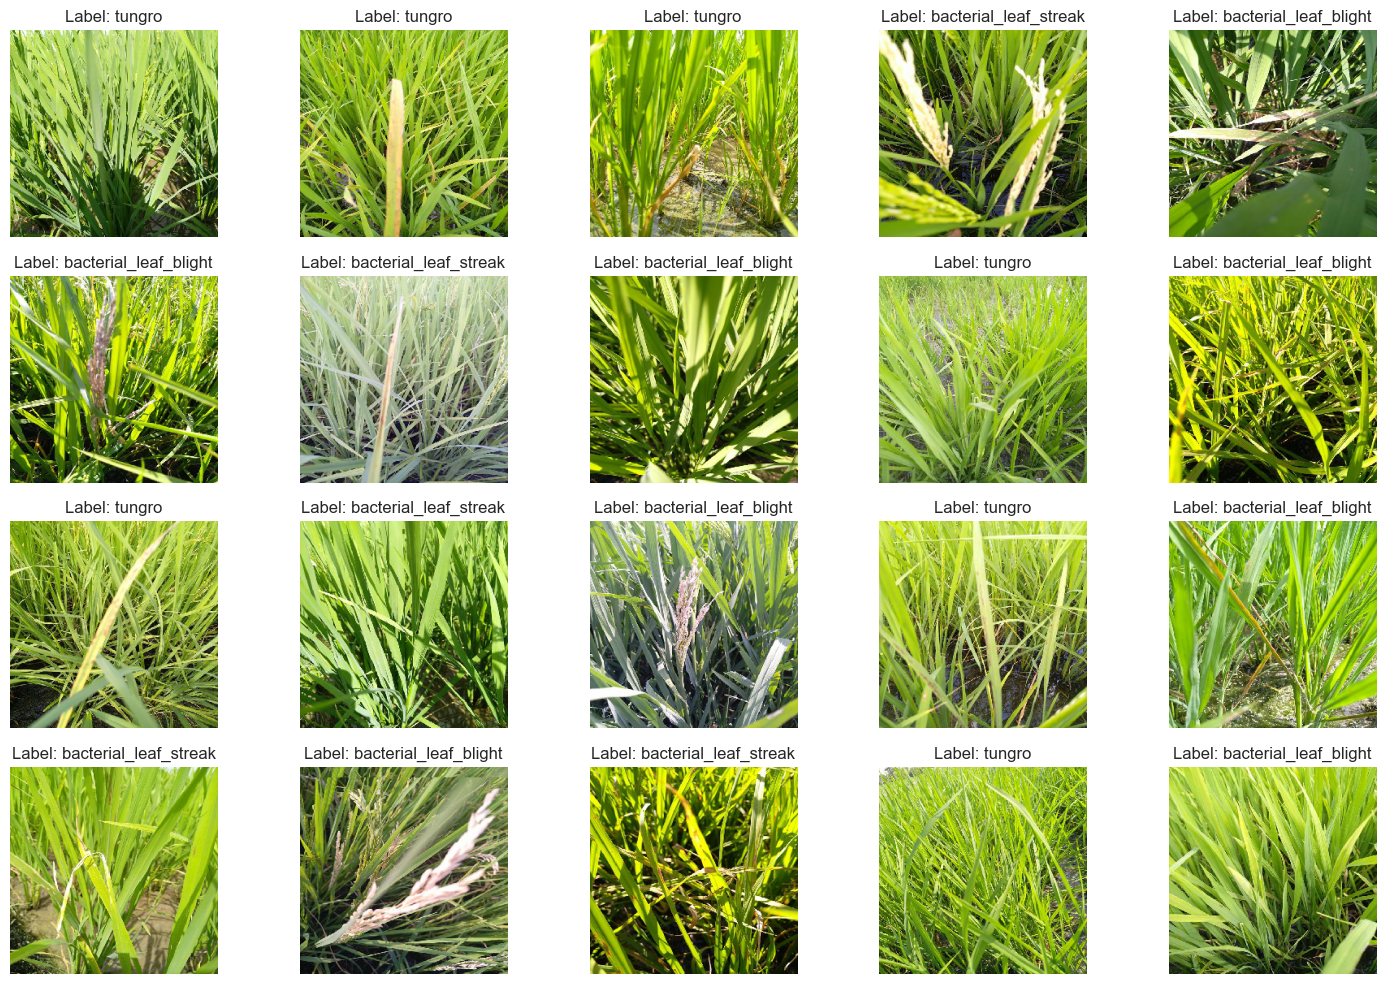

In [75]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras import layers, models

# Define the directory containing unlabeled images
images_dir = r'D:\main project\test_images'

# Define a dictionary to map predicted class indices to class names
class_names = {
    0: 'bacterial_leaf_blight',
    1: 'bacterial_leaf_streak',
    2: 'bacterial_panicle_blight',
    3: 'blast',
    4: 'brown_spot',
    5: 'dead_heart',
    6: 'downy_mildew',
    7: 'hispa',
    8: 'normal',
    9: 'tungro'
}

# Load DenseNet121 base model with custom input shape and without the top layer
base_model = DenseNet121(weights='imagenet', input_shape=(256, 256, 3), include_top=False)

# Add custom classification layers
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)  # Adjust the number of classes as needed
model = models.Model(inputs=base_model.input, outputs=x)

# Randomly select 20 image files from the directory
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(image_files, min(20, len(image_files)))

# Extract features and predict labels for each image
predicted_labels = []

for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize to custom input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Predict the class label
    predicted_label_index = np.argmax(model.predict(x))
    predicted_labels.append(class_names[predicted_label_index])

# Function to display images with predicted labels
def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=(256, 256))
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display images with predicted labels
display_images_with_labels(random_images, predicted_labels)


In [77]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet50 base
ResNet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')

# Freeze the base layers
ResNet50_base.trainable = False

# Build the ResNet50 model
resnet_model = Sequential()
resnet_model.add(ResNet50_base)
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.35))
resnet_model.add(Dense(220, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

# Compile the ResNet50 model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the ResNet50 model
resnet_history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=100, callbacks=[early_stopping])

# Save the ResNet50 model
resnet_model.save('resnet_model.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 554s 2s/step - accuracy: 0.3530 - loss: 1.9217 - val_accuracy: 0.4538 - val_loss: 1.8393
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 518s 2s/step - accuracy: 0.5461 - loss: 1.3809 - val_accuracy: 0.6077 - val_loss: 1.2871
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.6004 - loss: 1.1909 - val_accuracy: 0.7087 - val_loss: 0.9535
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 515s 2s/step - accuracy: 0.6509 - loss: 1.0552 - val_accuracy: 0.7058 - val_loss: 0.9019
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.6836 - loss: 0.9386 - val_accuracy: 0.7490 - val_loss: 0.7976
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 521s 2s/step - accuracy: 0.7136 - loss: 0.8566 - val_accuracy: 0.7837 - val_loss: 0.7308
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.7441 - loss: 0.7927 - val_accuracy: 0.7798 - val_loss: 0.6889
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━

In [81]:
resnet_model.save('resnet_model.keras')


In [83]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained Xception base
Xception_base = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')

# Freeze the base layers
Xception_base.trainable = False

# Build the Xception model
xception_model = Sequential([
    Xception_base,
    BatchNormalization(),
    Dropout(0.35),
    Dense(220, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the Xception model
xception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the Xception model
xception_history = xception_model.fit(train_ds, validation_data=validation_ds, epochs=100, callbacks=[early_stopping])

# Save the Xception model in the recommended Keras format
xception_model.save('xception_model.keras')  # Save in Keras-native format


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.4850 - loss: 1.6906 - val_accuracy: 0.7365 - val_loss: 0.9230
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.7513 - loss: 0.7824 - val_accuracy: 0.7885 - val_loss: 0.6668
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.8077 - loss: 0.5831 - val_accuracy: 0.8375 - val_loss: 0.5693
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.8383 - loss: 0.4799 - val_accuracy: 0.8471 - val_loss: 0.4985
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.8684 - loss: 0.3934 - val_accuracy: 0.8481 - val_loss: 0.4933
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 603s 2s/step - accuracy: 0.8851 - loss: 0.3466 - val_accuracy: 0.8683 - val_loss: 0.4666
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 605s 2s/step - accuracy: 0.9040 - loss: 0.2883 - val_accuracy: 0.8760 - val_loss: 0.4523
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━

In [93]:
import os
import pickle

# Ensure the directory exists
os.makedirs('D:/main project', exist_ok=True)

# Save the model
with open('D:/main project/model_pickle.pkl', 'wb') as f:
    pickle.dump(model, f)


In [1]:
import pickle

# Load the model from the .pkl file
with open('D:/main project/model_pickle.pkl', 'rb') as f:
    model = pickle.load(f)

# Now, you can use the model as needed



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


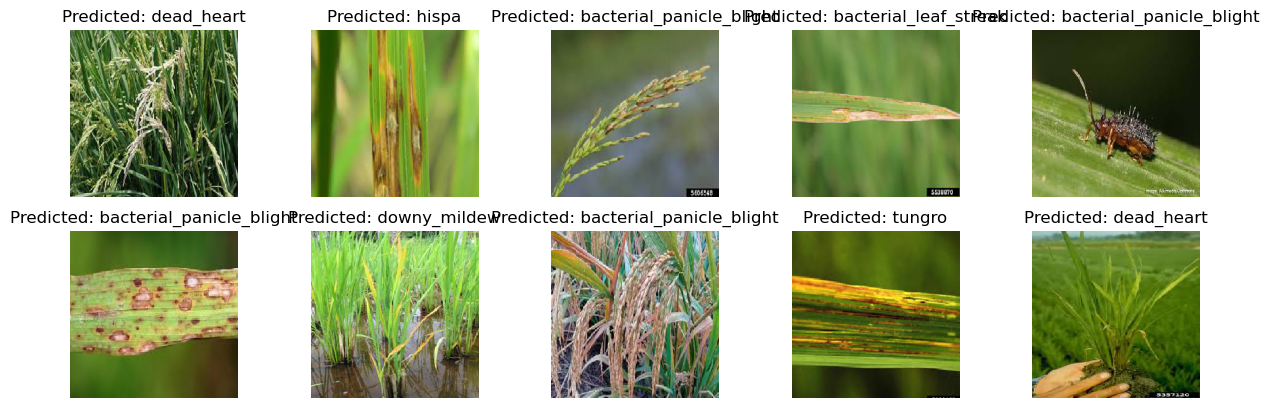

In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans

# Load pre-trained DenseNet121 model
model = load_model(r"D:\main project\Desnet121.keras")

# Define the directory containing images
images_dir = r'C:\Users\gauth\OneDrive\Desktop\Rice diseases'

# Define a dictionary to map predicted class indices to class names
class_names = {
    0: 'bacterial_leaf_blight',
    1: 'bacterial_leaf_streak',
    2: 'bacterial_panicle_blight',
    3: 'blast',
    4: 'brown_spot',
    5: 'dead_heart',
    6: 'downy_mildew',
    7: 'hispa',
    8: 'normal',
    9: 'tungro'
}

# Randomly select 10 image files from the directory
image_files = os.listdir(images_dir)
random_images = random.sample(image_files, 10)

# Extract features from each image
features = []
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features.append(model.predict(x).flatten())  # Flatten the output of the model

# Convert list of feature vectors to numpy array
features = np.array(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Function to display images with predicted labels
def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Predicted: {labels[i]}")
        plt.axis('off')
    plt.show()

# Predicted labels for each image
predicted_labels = []

# Print predicted labels for each image and display images
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predicted_label_index = model.predict(x)
    predicted_label = class_names[np.argmax(predicted_label_index)]  # Map predicted class index to class name
    predicted_labels.append(predicted_label)

# Display images with predicted labels
display_images_with_labels(random_images, predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


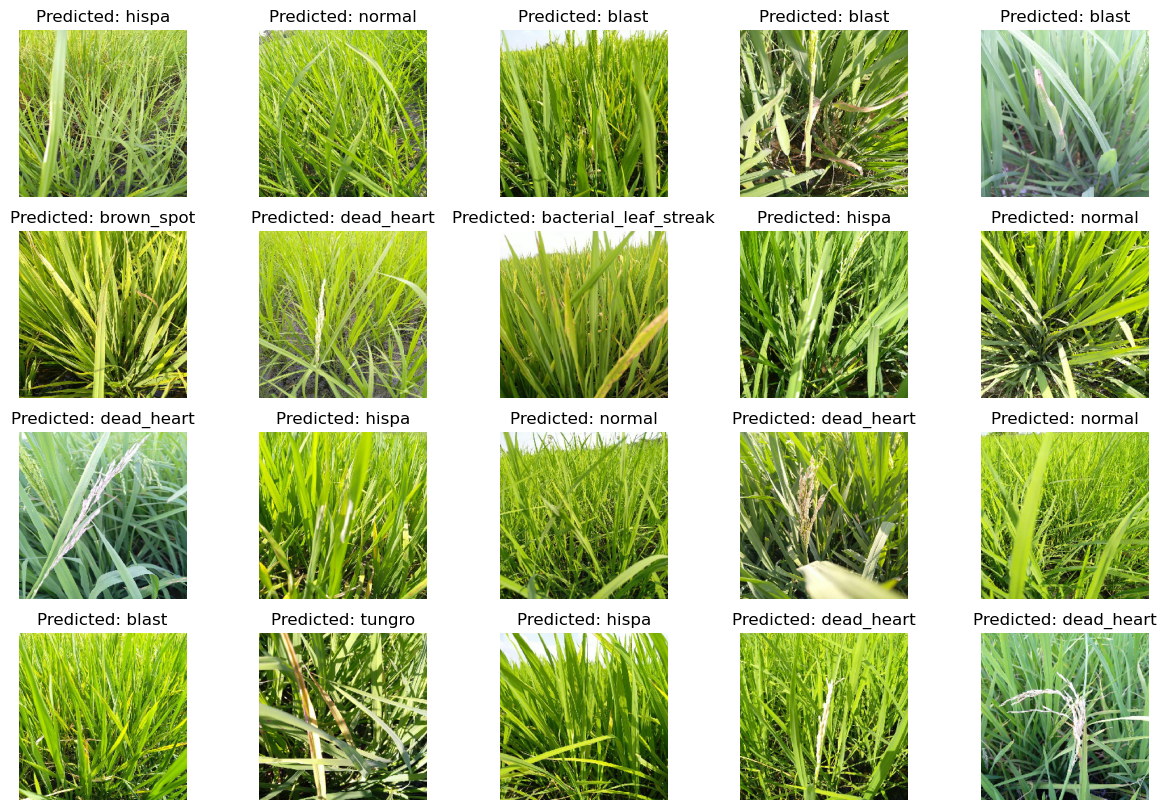

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans

# Load pre-trained DenseNet121 model
model = load_model(r"D:\main project\Desnet121.keras")

# Define the directory containing images
images_dir = r'D:\main project\test_images'

# Define a dictionary to map predicted class indices to class names
class_names = {
    0: 'bacterial_leaf_blight',
    1: 'bacterial_leaf_streak',
    2: 'bacterial_panicle_blight',
    3: 'blast',
    4: 'brown_spot',
    5: 'dead_heart',
    6: 'downy_mildew',
    7: 'hispa',
    8: 'normal',
    9: 'tungro'
}

# Select the first 20 images from the directory
image_files = os.listdir(images_dir)
random_images = image_files[:20]  # Take the first 20 images

# Extract features from each image
features = []
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = x / 255.0  # Normalize by dividing by 255.0
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    features.append(model.predict(x).flatten())  # Flatten the output of the model

# Convert list of feature vectors to numpy array
features = np.array(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Function to display images with predicted labels
def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input
        plt.subplot(4, 5, i + 1)  # Adjust grid for 20 images
        plt.imshow(img)
        plt.title(f"Predicted: {labels[i]}")
        plt.axis('off')
    plt.show()

# Predicted labels for each image
predicted_labels = []

# Print predicted labels for each image and display images
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = x / 255.0  # Normalize by dividing by 255.0
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    predicted_label_index = model.predict(x)
    predicted_label = class_names[np.argmax(predicted_label_index)]  # Map predicted class index to class name
    predicted_labels.append(predicted_label)

# Display images with predicted labels
display_images_with_labels(random_images, predicted_labels)
